# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 48.2 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 59.3 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 4.9 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 64.1 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 68.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 31.4 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 69.3 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 69.9 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 75.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 64.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 87.5 MB/s eta 0:00:01
     |██████████████████

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
torch.__version__

'1.11.0+cu102'

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [7]:
!pip install -U ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 886 kB/s eta 0:00:01
     |████████████████████████████████| 214 kB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 23.7 MB/s eta 0:00:01


In [5]:
# Define transforms
# Convert the images to pytorch tensor(i.e convert the values from 0-255 to 0-1) using ToTensor
# then, normalize the image by converting the values into a distribution from -1 to 1 centered around zero
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5))
])

# Create training set and define training dataloader
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader= torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
testset= torchvision.datasets.MNIST(root='./data',train=False, download=True, transform=transform)
testloader= torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**There are 2 kinds of transformations I applied to the images:
First: I used ToTensor() to convert the images from PIL images or arrays to pytorch tensors and also the values of the pixels are changed from 0-225 to become in the range of 0-1
Second: I noramalized the images using transforms.Normalize and by normalization, the values became in the range from -1 to 1 centered around 0**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


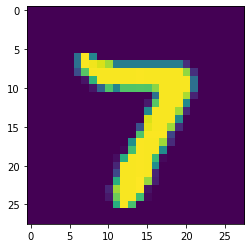

6


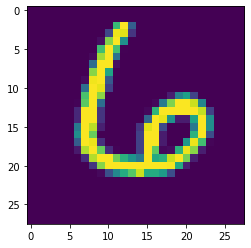

2


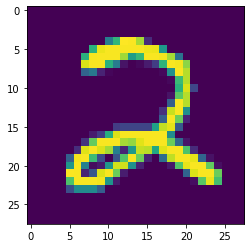

7


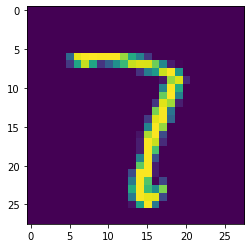

9


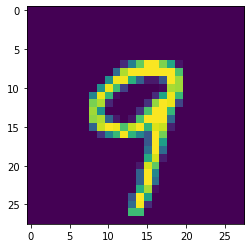

In [7]:
# Explore data
show5(trainloader)

7


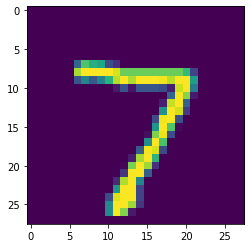

2


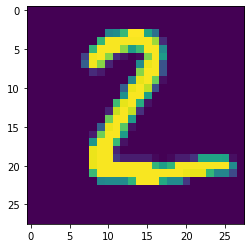

1


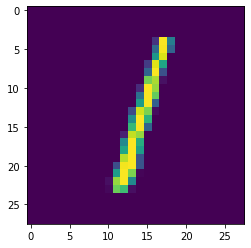

0


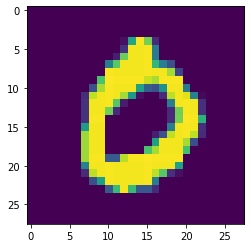

4


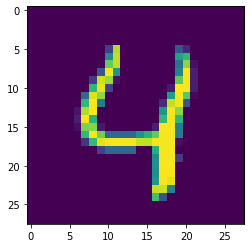

In [8]:
show5(testloader)

In [9]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [10]:
testset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [11]:
trainset.data.shape

torch.Size([60000, 28, 28])

In [12]:
trainset.data.data[3]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [13]:
trainset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [14]:
testset.targets.shape

torch.Size([10000])

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
model = nn.Sequential(nn.Linear(784, 128),
                          nn.ReLU(),
                          nn.Dropout(0.3),
                          nn.Linear(128, 64), 
                          nn.ReLU(),
                          nn.Linear(64, 10),
                          nn.LogSoftmax(dim=1))

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
# define the loss function 
criterion = nn.NLLLoss()

# define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.003)
model.to(device);

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
epochs = 10
train_losses=  []
for e in range (epochs):
    #we set the total loss to 0 before each epoch
    running_loss = 0
    model.train()
    #we iterate through images and labels batches in the trainloader
    for i, (images, labels) in enumerate(trainloader):
        images = images.view(images.shape[0], -1)
        # Move input and label tensors to the default device
        images, labels = images.to(device), labels.to(device)
        #set the gradients to zero before each forward pass through each batch
        optimizer.zero_grad()
        #forward pass
        log_ps = model(images)
        #calculate the loss
        loss = criterion(log_ps, labels)
        #backward propagation to calculate the gradients
        loss.backward()
        #update the weights and biases
        optimizer.step()
        #add the batch calculated loss value to the total loss of the epoch
        running_loss += loss.item()
        if (i + 1) % 250 == 0:  # Print every 250 batches
            print(f'Epoch [{e + 1}/{epochs}], Batch [{i + 1}], Loss: {running_loss / (i+1):.4f}')
    avg_training_loss= running_loss/len(trainloader)
    train_losses.append(avg_training_loss)
            

Epoch [1/10], Batch [250], Loss: 2.2420
Epoch [1/10], Batch [500], Loss: 2.1717
Epoch [1/10], Batch [750], Loss: 2.0742
Epoch [2/10], Batch [250], Loss: 1.3388
Epoch [2/10], Batch [500], Loss: 1.2180
Epoch [2/10], Batch [750], Loss: 1.1179
Epoch [3/10], Batch [250], Loss: 0.7513
Epoch [3/10], Batch [500], Loss: 0.7102
Epoch [3/10], Batch [750], Loss: 0.6861
Epoch [4/10], Batch [250], Loss: 0.5726
Epoch [4/10], Batch [500], Loss: 0.5578
Epoch [4/10], Batch [750], Loss: 0.5463
Epoch [5/10], Batch [250], Loss: 0.4899
Epoch [5/10], Batch [500], Loss: 0.4839
Epoch [5/10], Batch [750], Loss: 0.4787
Epoch [6/10], Batch [250], Loss: 0.4441
Epoch [6/10], Batch [500], Loss: 0.4461
Epoch [6/10], Batch [750], Loss: 0.4399
Epoch [7/10], Batch [250], Loss: 0.4154
Epoch [7/10], Batch [500], Loss: 0.4129
Epoch [7/10], Batch [750], Loss: 0.4073
Epoch [8/10], Batch [250], Loss: 0.3923
Epoch [8/10], Batch [500], Loss: 0.3886
Epoch [8/10], Batch [750], Loss: 0.3833
Epoch [9/10], Batch [250], Loss: 0.3689


Plot the training loss (and validation loss/accuracy, if recorded).

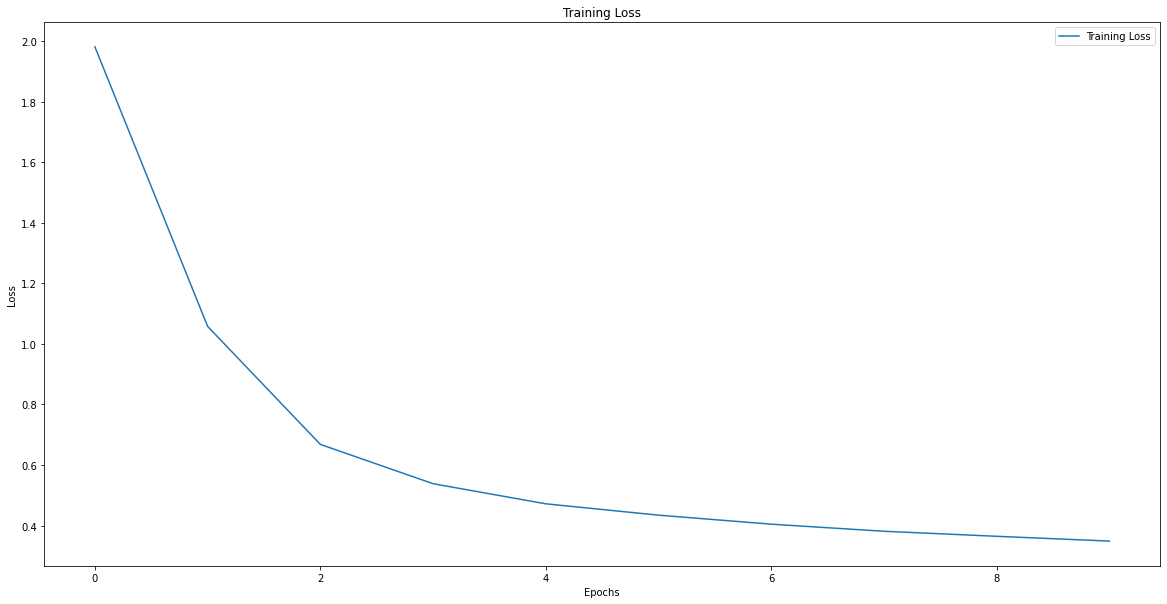

In [9]:
plt.figure(figsize=(20,10))
plt.title("Training Loss")
plt.plot(train_losses,label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
test_losses = []
for e in range(epochs):
    test_loss= 0
    accuracy= 0
    model.eval()
     #turn off the gradient calculation for validation purposes
    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            images, labels = images.to(device), labels.to(device)
            log_ps = model(images)
            batch_loss = criterion(log_ps, labels)
            test_loss += batch_loss.item()
            # Calculate accuracy
            ps = torch.exp(log_ps)
            #determine the top class and the top probability across the second dimension
            top_p, top_class = ps.topk(1, dim=1)
            #create equals tensor by equating between the top_class tensor and labels tensor after adjusting the latter'shape
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
    
    

Epoch: 1/10..  Test Loss: 0.278..  Test Accuracy: 0.920
Epoch: 2/10..  Test Loss: 0.278..  Test Accuracy: 0.920
Epoch: 3/10..  Test Loss: 0.278..  Test Accuracy: 0.920
Epoch: 4/10..  Test Loss: 0.278..  Test Accuracy: 0.920
Epoch: 5/10..  Test Loss: 0.278..  Test Accuracy: 0.920
Epoch: 6/10..  Test Loss: 0.278..  Test Accuracy: 0.920
Epoch: 7/10..  Test Loss: 0.278..  Test Accuracy: 0.920
Epoch: 8/10..  Test Loss: 0.278..  Test Accuracy: 0.920
Epoch: 9/10..  Test Loss: 0.278..  Test Accuracy: 0.920
Epoch: 10/10..  Test Loss: 0.278..  Test Accuracy: 0.920


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [11]:
#we could change the optimizer to Adam and change the learning rate to 0.001 and change the number of epochs to be 20

# define the loss function 
criterion2 = nn.NLLLoss()
epochs= 20

# define the optimizer
optimizer2 = optim.Adam(model.parameters(), lr=0.001)
model.to(device);

In [12]:
epochs = 20
train_losses, test_losses = [], []
for e in range (epochs):
    #we set the total loss to 0 before each epoch
    running_loss = 0
    model.train()
    #we iterate through images and labels batches in the trainloader
    for i, (images, labels) in enumerate(trainloader):
        images = images.view(images.shape[0], -1)
        # Move input and label tensors to the default device
        images, labels = images.to(device), labels.to(device)
        #set the gradients to zero before each forward pass through each batch
        optimizer2.zero_grad()
        #forward pass
        log_ps = model(images)
        #calculate the loss
        loss = criterion2(log_ps, labels)
        #backward propagation to calculate the gradients
        loss.backward()
        #update the weights and biases
        optimizer2.step()
        #add the batch calculated loss value to the total loss of the epoch
        running_loss += loss.item()
        
    #after iterating through all the batches in the epoch we test the accuracy for the current epoch
    else:
        test_loss = 0
        accuracy = 0
        model.eval()
        #turn off the gradient calculation for validation purposes
        with torch.no_grad():
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                images, labels = images.to(device), labels.to(device)
                log_ps = model(images)
                batch_loss = criterion2(log_ps, labels)
                test_loss += batch_loss.item()
                # Calculate accuracy
                ps = torch.exp(log_ps)
                #determine the top class and the top probability across the second dimension
                top_p, top_class = ps.topk(1, dim=1)
                #create equals tensor by equating between the top_class tensor and labels tensor after adjusting the latter'shape
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
            

Epoch: 1/20..  Training Loss: 0.314..  Test Loss: 0.160..  Test Accuracy: 0.951
Epoch: 2/20..  Training Loss: 0.219..  Test Loss: 0.158..  Test Accuracy: 0.949
Epoch: 3/20..  Training Loss: 0.188..  Test Loss: 0.131..  Test Accuracy: 0.960
Epoch: 4/20..  Training Loss: 0.167..  Test Loss: 0.118..  Test Accuracy: 0.963
Epoch: 5/20..  Training Loss: 0.154..  Test Loss: 0.111..  Test Accuracy: 0.965
Epoch: 6/20..  Training Loss: 0.145..  Test Loss: 0.103..  Test Accuracy: 0.967
Epoch: 7/20..  Training Loss: 0.136..  Test Loss: 0.095..  Test Accuracy: 0.971
Epoch: 8/20..  Training Loss: 0.128..  Test Loss: 0.098..  Test Accuracy: 0.969
Epoch: 9/20..  Training Loss: 0.124..  Test Loss: 0.104..  Test Accuracy: 0.968
Epoch: 10/20..  Training Loss: 0.114..  Test Loss: 0.091..  Test Accuracy: 0.973
Epoch: 11/20..  Training Loss: 0.115..  Test Loss: 0.091..  Test Accuracy: 0.973
Epoch: 12/20..  Training Loss: 0.110..  Test Loss: 0.085..  Test Accuracy: 0.974
Epoch: 13/20..  Training Loss: 0.106.

## Saving your model
Using `torch.save`, save your model for future loading.

In [13]:
checkpoint= {'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer2.state_dict(),
    'criterion_state_dict': criterion2.state_dict(),
    'epochs': epochs,
    'classifier': model
    }

torch.save(checkpoint, 'checkpoint.pth')